# Age Detector CNN Small
The purpose of this notebook is to train a Convolutional Neural Network which is able to perform age detection on a dataset of labeled faces.<br>

### Imports

In [1]:
import cv2
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

### Dataset loading and preparation

In [2]:
# Access to the dataset directory
images = os.listdir('data/combined_faces')

# Age ranges are defined
ranges = ['1-2','3-9','10-20','21-27','28-45','46-65','66-116']

# Arrays are initialized
X = []
y = []
l = len(images)

print("Loading dataset... Please wait")

# Images and labels are read and stored in the X and y variables
for a in range(l):
    X.append(cv2.imread(f'data/combined_faces/{images[a]}',0))
    age = int(images[a].split('_')[0])
    
    if age>=1 and age<=2:
        y.append(0)
    elif age>=3 and age<=9:
        y.append(1)
    elif age>=10 and age<=20:
        y.append(2)
    elif age>=21 and age<=27:
        y.append(3)
    elif age>=28 and age<=45:
        y.append(4)
    elif age>=46 and age<=65:
        y.append(5)
    elif age>=66 and age<=116:
        y.append(6)

Loading dataset... Please wait


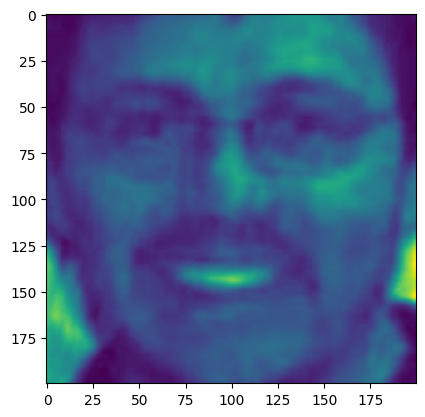

In [3]:
# Sample image
plt.imshow(X[0])

In [4]:
# Target variables are converted in one hot encoding
y = np_utils.to_categorical(y)
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [5]:
# Training and test set are created
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train = np.array(X_train).reshape(-1,200,200,1)
X_test = np.array(X_test).reshape(-1,200,200,1)

### Model preparation and training

In [6]:
# Constant are defined
IMG_HEIGHT = 200
IMG_WIDTH = 200
IMG_SIZE = (IMG_HEIGHT,IMG_WIDTH)

# Hyperparams
batch_size = 64
epochs = 30

In [7]:
# Normalization of pixel values is performed
train_datagen = ImageDataGenerator(rescale=1./255,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow(X_train,y_train,batch_size)
test_data = test_datagen.flow(X_test,y_test,batch_size)

In [8]:
cnn = Sequential()
cnn.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(200, 200, 1)))    # 3rd dim = 1 for grayscale images.
cnn.add(AveragePooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(AveragePooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(AveragePooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(AveragePooling2D(pool_size=(2,2)))
cnn.add(GlobalAveragePooling2D())
cnn.add(Dense(66, activation='relu'))
cnn.add(Dense(7, activation='softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-30 18:14:49.156897: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-30 18:14:49.162489: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      160       
                                                                 
 average_pooling2d (AverageP  (None, 99, 99, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 48, 48, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 23, 23, 64)       0

In [9]:
# A checkpoint object is created, it allows to store the model once the training is completed
checkpoint = ModelCheckpoint(filepath="models/cnn_model_small.h5",
                             monitor='val_accuracy',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1
                            )

In [10]:
# The model is finally trained
history = cnn.fit(train_data,
                    batch_size=batch_size,
                    validation_data=test_data,
                    epochs=epochs,
                    callbacks=[checkpoint],
                    shuffle=False    
                    ) 

Epoch 1/30


2022-10-30 18:14:49.850663: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-30 18:14:50.395603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


367/367 [==============================] - ETA: 0s - loss: 1.7929 - accuracy: 0.2876

2022-10-30 18:15:10.968144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.30022, saving model to cnn_model_small.h5
367/367 [==============================] - 24s 59ms/step - loss: 1.7929 - accuracy: 0.2876 - val_loss: 1.7615 - val_accuracy: 0.3002
Epoch 2/30
366/367 [============================>.] - ETA: 0s - loss: 1.7190 - accuracy: 0.3236
Epoch 2: val_accuracy improved from 0.30022 to 0.33586, saving model to cnn_model_small.h5
367/367 [==============================] - 21s 58ms/step - loss: 1.7192 - accuracy: 0.3235 - val_loss: 1.6919 - val_accuracy: 0.3359
Epoch 3/30
366/367 [============================>.] - ETA: 0s - loss: 1.6685 - accuracy: 0.3396
Epoch 3: val_accuracy improved from 0.33586 to 0.34143, saving model to cnn_model_small.h5
367/367 [==============================] - 21s 58ms/step - loss: 1.6686 - accuracy: 0.3396 - val_loss: 1.6421 - val_accuracy: 0.3414
Epoch 4/30
366/367 [============================>.] - ETA: 0s - loss: 1.6121 - accuracy: 0.3586
Epoch 4: val_accuracy improved from 0.3414

### Results

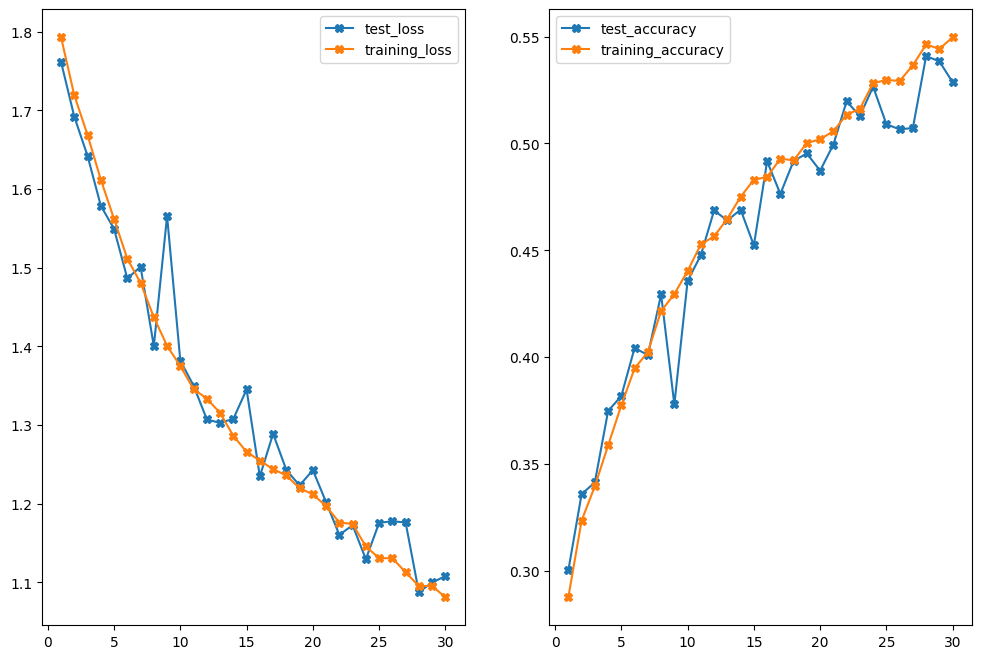

In [11]:
# Training and test loss and accuracy are printed
plotting_data_dict = history.history
plt.figure(figsize=(12,8))
test_loss = plotting_data_dict['val_loss']
training_loss = plotting_data_dict['loss']
test_accuracy = plotting_data_dict['val_accuracy']
training_accuracy = plotting_data_dict['accuracy']
epochs = range(1,len(test_loss)+1)
plt.subplot(121)
plt.plot(epochs,test_loss,marker='X',label='test_loss')
plt.plot(epochs,training_loss,marker='X',label='training_loss')
plt.legend()
plt.subplot(122)
plt.plot(epochs,test_accuracy,marker='X',label='test_accuracy')
plt.plot(epochs,training_accuracy,marker='X',label='training_accuracy')
plt.legend()